# Creating synthetic dataset with price fluctuations based on  the Australia Grocery Product Dataset 

In [12]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [4]:
# importing dataset
data = pd.read_csv('Australia_Grocery_2022Sep.csv')

# finding count of unique values in Product_Name column
unique_count = data['Product_Name'].nunique()
print(unique_count)

# dropping unwanted columns
data2 = data.drop(['index', 'Postal_code', 'Package_price', 'Price_per_unit', 'package_size','is_estimated','is_special', 'in_stock','Retail_price', 'Product_Url', 
           'unit_price_unit','state', 'city', 'tid'], axis=1)

# checking columns
for col in data2.columns:
    print(col)


7193
Category
Sub_category
Product_Group
Product_Name
Brand
Sku
RunDate
unit_price


In [5]:
# group by 'Product_Name' and calculate the mean of 'unit_price'
mean_prices = data2.groupby('Product_Name')['unit_price'].mean().reset_index()

# merge mean_prices back into the original dataset, replacing 'unit_price' with mean prices
data3 = pd.merge(data2.drop_duplicates('Product_Name'), mean_prices, on='Product_Name', how='left')

# dropping duplicated column
data3 = data3.drop(['unit_price_y'], axis=1)

len(data3)

7193

In [7]:
# converting 'RunDate' from object to date
data3['RunDate'] = pd.to_datetime(data3['RunDate']).dt.date

In [9]:

# specify the number of synthetic rows  to add
num_synthetic_rows = 45000  

# create a copy of the original DataFrame
synthetic_df = pd.DataFrame(columns=data3.columns)

# iterate over each row in the DataFrame
for _ in range(num_synthetic_rows):
    # select a random row from the original DataFrame
    original_row = data3.sample()
    
    # extract values from the original row
    product_name = original_row['Product_Name'].iloc[0]  # Assuming 'Product_Name' is the column with product names
    original_price = original_row['unit_price_x'].iloc[0]  # Assuming 'unit_price_x' is the column with prices
    
############ 2020 ############
    # generate a synthetic unit price within +/- 2 of the original price for 2020
    synthetic_price = max(0.5, round(original_price + random.uniform(-2, 2),2))  # Ensure price is not below zero and round to 2 decimals
    
    # generate a synthetic date within the desired range
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2020, 12, 31)
    synthetic_date = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))

############ 2021 ############
    # generate a synthetic unit price within +3/0 of the original price for 2021
    synthetic_price2 = max(0.5, round(original_price + random.uniform(0, 3),2))  # Ensure price is not below zero and round to 2 decimals
    
    # generate a synthetic date within the desired range
    start_date2 = datetime(2021, 1, 1)
    end_date2 = datetime(2021, 12, 31)
    synthetic_date2 = start_date2 + timedelta(days=random.randint(0, (end_date2 - start_date2).days))

############ 2022 ############
    # generate a synthetic unit price within +2-5 of the original price for 2021
    synthetic_price3 = max(0.5, round(original_price + random.uniform(2, 5),2))  # Ensure price is not below zero and round to 2 decimals
    
    # generate a synthetic date within the desired range
    start_date3 = datetime(2022, 1, 1)
    end_date3 = datetime(2022, 12, 31)
    synthetic_date3 = start_date3 + timedelta(days=random.randint(0, (end_date3 - start_date3).days))
    
############ 2023 ############
    # generate a synthetic unit price within +4-7 of the original price for 2021
    synthetic_price4 = max(0.5, round(original_price + random.uniform(4, 7),2))  # Ensure price is not below zero and round to 2 decimals
    
    # generate a synthetic date within the desired range
    start_date4 = datetime(2023, 1, 1)
    end_date4 = datetime(2023, 12, 31)
    synthetic_date4 = start_date4 + timedelta(days=random.randint(0, (end_date4 - start_date4).days))

    # create a synthetic row with the same values as the original row except for 'RunDate' and 'unit_price_x'
    synthetic_row = {
        'Category': original_row['Category'].iloc[0],
        'Sub_category': original_row['Sub_category'].iloc[0],
        'Product_Group': original_row['Product_Group'].iloc[0],
        'Product_Name': product_name,
        'Brand': original_row['Brand'].iloc[0],
        'Sku': original_row['Sku'].iloc[0],
        'RunDate': synthetic_date,
        'unit_price_x': synthetic_price
    }

    synthetic_row2 = {
        'Category': original_row['Category'].iloc[0],
        'Sub_category': original_row['Sub_category'].iloc[0],
        'Product_Group': original_row['Product_Group'].iloc[0],
        'Product_Name': product_name,
        'Brand': original_row['Brand'].iloc[0],
        'Sku': original_row['Sku'].iloc[0],
        'RunDate': synthetic_date2,
        'unit_price_x': synthetic_price2
    }

    synthetic_row3 = {
        'Category': original_row['Category'].iloc[0],
        'Sub_category': original_row['Sub_category'].iloc[0],
        'Product_Group': original_row['Product_Group'].iloc[0],
        'Product_Name': product_name,
        'Brand': original_row['Brand'].iloc[0],
        'Sku': original_row['Sku'].iloc[0],
        'RunDate': synthetic_date3,
        'unit_price_x': synthetic_price3
    }
    
    synthetic_row4 = {
        'Category': original_row['Category'].iloc[0],
        'Sub_category': original_row['Sub_category'].iloc[0],
        'Product_Group': original_row['Product_Group'].iloc[0],
        'Product_Name': product_name,
        'Brand': original_row['Brand'].iloc[0],
        'Sku': original_row['Sku'].iloc[0],
        'RunDate': synthetic_date4,
        'unit_price_x': synthetic_price4
    }
    
    # append the synthetic row to the synthetic DataFrame
    synthetic_df = pd.concat([synthetic_df, pd.DataFrame([synthetic_row])], ignore_index=True)
    synthetic_df2 = pd.concat([synthetic_df, pd.DataFrame([synthetic_row2])], ignore_index=True)
    synthetic_df3 = pd.concat([synthetic_df, pd.DataFrame([synthetic_row3])], ignore_index=True)
    synthetic_df4 = pd.concat([synthetic_df, pd.DataFrame([synthetic_row4])], ignore_index=True)

    merged_df = pd.concat([synthetic_df, synthetic_df2, synthetic_df3,synthetic_df4], axis=0)

# concatenate the synthetic DataFrame with the original DataFrame
data4 = pd.concat([data3, merged_df], ignore_index=True)
data4['unit_price_x'] = data4['unit_price_x'].round(2)
data4['RunDate'] = pd.to_datetime(data4['RunDate']).dt.date



In [10]:
data4.to_csv(r"C:\Users\robin\Downloads\Subjects Y2T1\SIT764\Australia Grocery Product Dataset\Aus_grocery_synthetic_dataset2.csv", index=False)

In [11]:
df = pd.read_csv('Aus_grocery_synthetic_dataset2.csv')

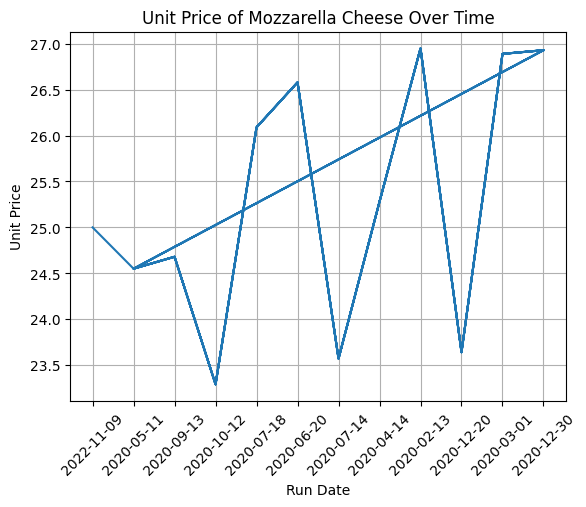

In [14]:
# Filter data for 'Mozzarella Cheese'
df_filtered = df[df['Product_Name'] == 'Mozzarella Cheese']

# Select the desired columns
run_dates = df_filtered['RunDate']
unit_prices = df_filtered['unit_price_x']

# Plot the line graph
plt.plot(run_dates, unit_prices)

# Set labels and title
plt.xlabel('Run Date')
plt.ylabel('Unit Price')
plt.title('Unit Price of Mozzarella Cheese Over Time')

# Rotate x-axis labels for readability if many dates
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.show()